# Hsumanim
This script is a slightly modified version of hsum.C.
When run in batch mode, it produces an animated gif file.




**Author:**  Rene Brun, Valeriy Onuchin  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:01 AM.</small></i>

In [1]:
auto c1 = new TCanvas("c1","The HSUM example",200,10,600,400);
c1->SetGrid();

gBenchmark->Start("hsum");

Create some histograms.

In [2]:
auto total  = new TH1F("total","This is the total distribution",100,-4,4);
auto main   = new TH1F("main","Main contributor",100,-4,4);
auto s1     = new TH1F("s1","This is the first signal",100,-4,4);
auto s2     = new TH1F("s2","This is the second signal",100,-4,4);
total->Sumw2();   // this makes sure that the sum of squares of weights will be stored
total->SetMarkerStyle(21);
total->SetMarkerSize(0.7);
main->SetFillColor(16);
s1->SetFillColor(42);
s2->SetFillColor(46);
TSlider *slider = 0;
gSystem->Unlink("hsumanim.gif"); // delete old file

Fill histograms randomly

In [3]:
gRandom->SetSeed();
const Int_t kUPDATE = 500;
Float_t xs1, xs2, xmain;
Int_t gifcnt = 0;
for ( Int_t i=0; i<10000; i++) {
   xmain = gRandom->Gaus(-1,1.5);
   xs1   = gRandom->Gaus(-0.5,0.5);
   xs2   = gRandom->Landau(1,0.15);
   main->Fill(xmain);
   s1->Fill(xs1,0.3);
   s2->Fill(xs2,0.2);
   total->Fill(xmain);
   total->Fill(xs1,0.3);
   total->Fill(xs2,0.2);
   if (i && (i%kUPDATE) == 0) {
      if (i == kUPDATE) {
         total->Draw("e1p");
         main->Draw("same");
         s1->Draw("same");
         s2->Draw("same");
         c1->Update();
         slider = new TSlider("slider","test",4.2,0,4.6,total->GetMaximum(),38);
         slider->SetFillColor(46);
      }
      if (slider) slider->SetRange(0,Float_t(i)/10000.);
      c1->Modified();
      c1->Update();
      if (gROOT->IsBatch()) {
         c1->Print("hsumanim.gif+");
         printf("i = %d\n", i);
      } else {
         if (gSystem->ProcessEvents())
            break;
      }
   }
}
slider->SetRange(0,1);
total->Draw("sameaxis"); // to redraw axis hidden by the fill area
c1->Modified();

i = 500
i = 1000
i = 1500
i = 2000
i = 2500
i = 3000
i = 3500
i = 4000
i = 4500
i = 5000
i = 5500
i = 6000
i = 6500
i = 7000
i = 7500
i = 8000
i = 8500
i = 9000
i = 9500


Make infinite animation by adding "++" to the file name

In [4]:
if (gROOT->IsBatch()) c1->Print("hsumanim.gif++");

You can view the animated file hsumanim.gif with netscape/ie or mozilla

In [5]:
gBenchmark->Show("hsum");

hsum      : Real Time =   1.77 seconds Cpu Time =   1.53 seconds


Draw all canvases 

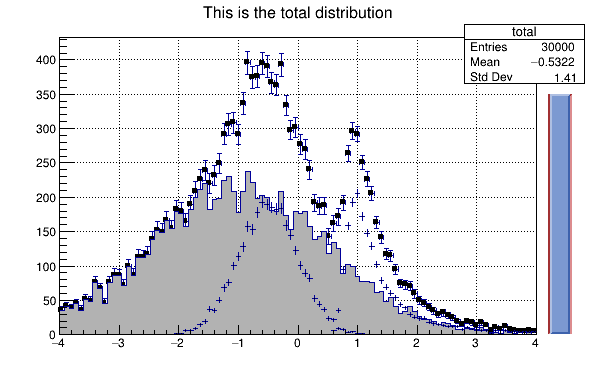

In [6]:
gROOT->GetListOfCanvases()->Draw()